# Life Expectancy GDP

For this project, I will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

The dataset was provided by codecademy in a file labeld `all_data.csv`. The dataset has the following columns:

__Country__ - nation<br>
__Year__ - the year for the observation<br>
__Life expectancy at birth (years)__ - life expectancy value in years<br>
__GDP__ - Gross Domestic Product in U.S. dollars

## Data importing and setup

Importing necessary libraries to analyze and visualize dataset.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Loading the `all_data.csv` file into a panda dataframe. Renamed column Life expectancy at birth (years) to LEABY for simplicity purposes. Viewing the dataframes head to confirm the column name change. Also used df.info() to ensure all values were non-null and dtype was correct for each corresponding columns.

In [2]:
df = pd.read_csv('all_data.csv')
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
print(df.head(), df.info())
print(df.Year.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEABY    96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10 None
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Data analysis and visualizations

**GDP distribution**: Plotting a histogram of the GDP column to get an idea of the distribution of this variable. The shape is right-skewed, indicating that most countries have lower GDP values, with a few countries having significantly higher GDPs.

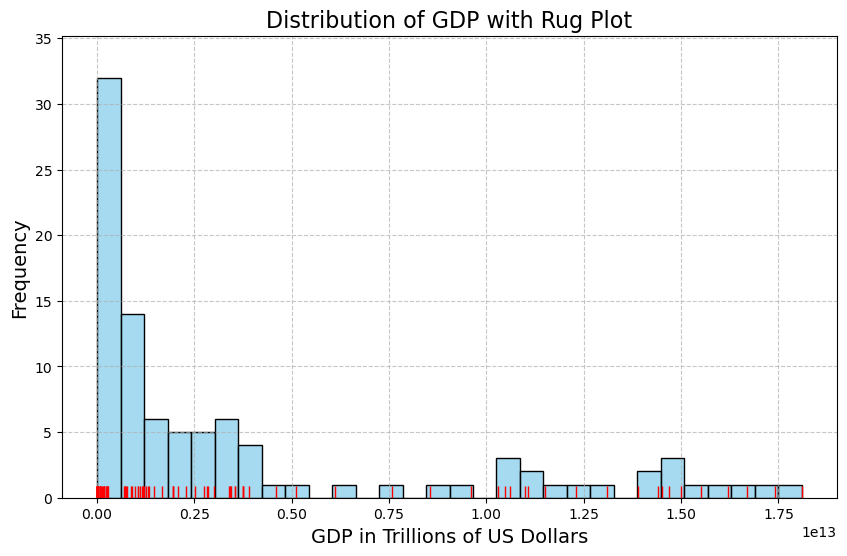

In [3]:
import warnings
# Suppress specific FutureWarning
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

# GDP Distribution Plot
plt.figure(figsize=(10, 6))

# Plotting histogram without rug plot
sns.histplot(df.GDP, bins=30, kde=False, color='skyblue', edgecolor='black')

# Adding rug plot with a contrasting color
sns.rugplot(df.GDP, color='red')

# Adding titles and labels
plt.title('Distribution of GDP with Rug Plot', fontsize=16)
plt.xlabel('GDP in Trillions of US Dollars', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


**LEABY distribution**: Plotting a histogram of the LEABY column to get an idea of the distribution of this variable. The shape is left-skewed, with most values falling between 75 and 80 years. There also appear to be a few main groupings in the distribution, suggesting distinct clusters of life expectancy values.

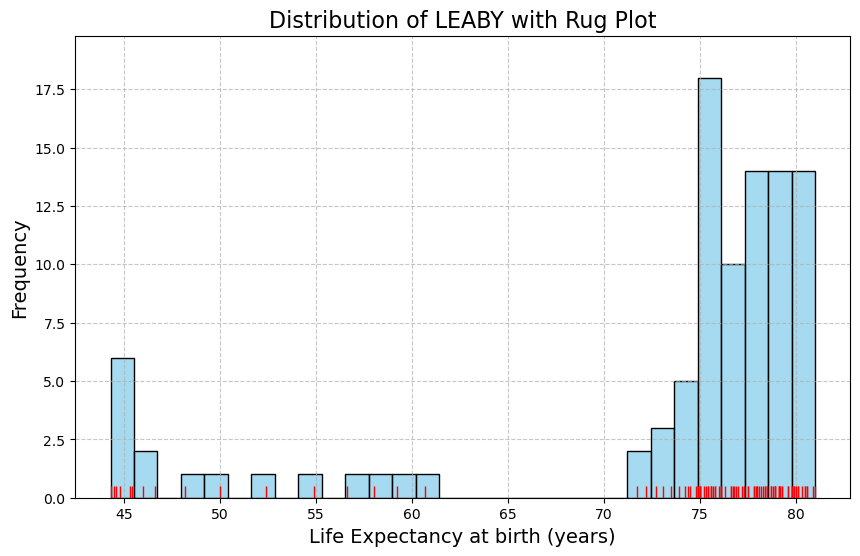

In [4]:
# GDP Distribution Plot
plt.figure(figsize=(10, 6))

# Plotting histogram without rug plot
sns.histplot(df.LEABY, bins=30, kde=False, color='skyblue', edgecolor='black')

# Adding rug plot with a contrasting color
sns.rugplot(df.LEABY, color='red')

# Adding titles and labels
plt.title('Distribution of LEABY with Rug Plot', fontsize=16)
plt.xlabel('Life Expectancy at birth (years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

## Mean GDP and LEABY by countries

In [5]:
# Calculate the mean GDP and LEABY for each country, excluding the Year column
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


## GDP Distribution by Country

The following visualization displays the distribution of Gross Domestic Product (GDP) across various countries, illustrating the variation in economic output. GDP is measured in trillions of US dollars for consistency. The countries included are:

- **Chile**: A developing economy with moderate GDP.
- **China**: The world’s second-largest economy with substantial GDP.
- **Germany**: A major European economy with significant GDP.
- **Mexico**: A growing economy with lower GDP compared to the major economies.
- **United States of America**: The largest economy globally, showing the highest GDP.
- **Zimbabwe**: A country with a relatively small GDP compared to others in this dataset.

This visualization provides insight into the economic scale of these countries and highlights the significant disparity in GDP levels.


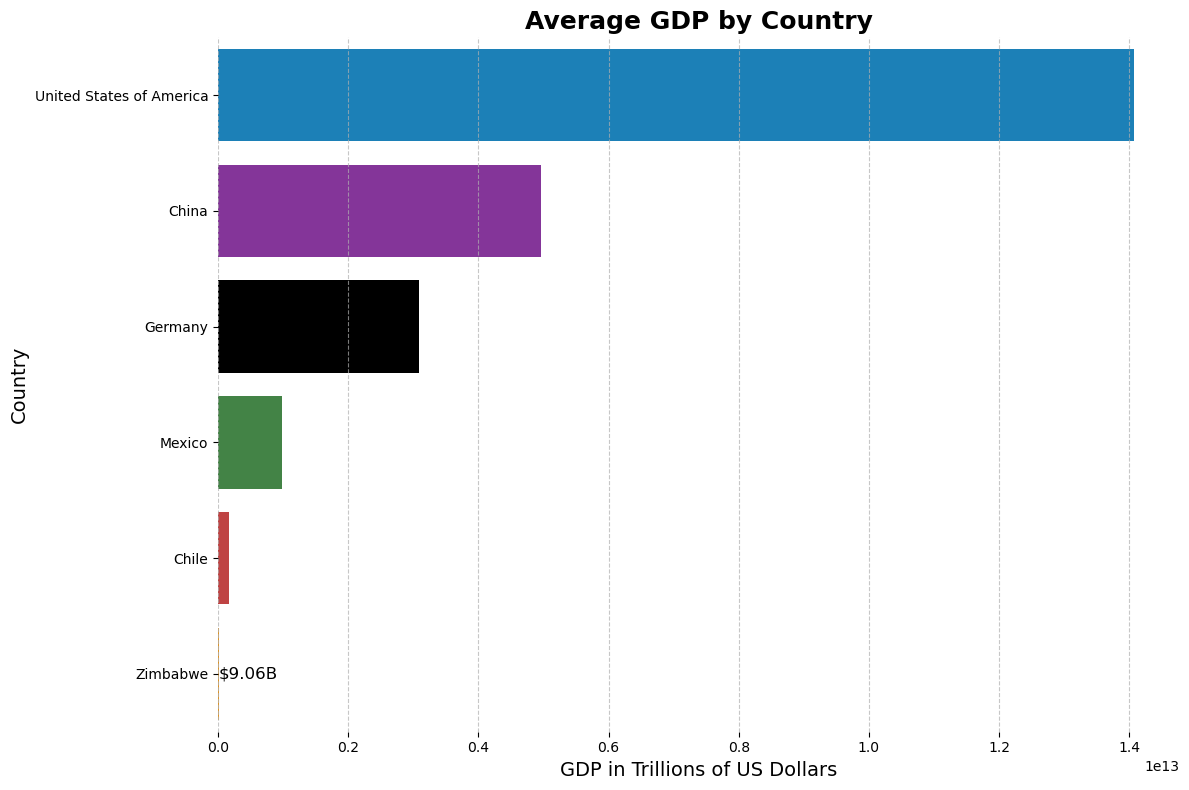

<Figure size 640x480 with 0 Axes>

In [6]:
# Define updated color palette with varied colors
color_palette = {
    'Chile': '#D32F2F',  # Crimson Red
    'China': '#8E24AA',  # Purple
    'Germany': '#000000',  # Black
    'Mexico': '#388E3C',  # Forest Green
    'United States of America': '#0288D1',  # Sky Blue
    'Zimbabwe': '#FF9800'  # Orange
}

# Sort dfMeans by GDP in descending order
dfMeans = dfMeans.sort_values(by='GDP', ascending=False)

# Enhanced GDP Bar Plot
plt.figure(figsize=(12, 8))

# Plotting bar plot with custom color palette
barplot = sns.barplot(x="GDP", y="Country", data=dfMeans, palette=color_palette)

# Adding titles and labels
plt.title('Average GDP by Country', fontsize=18, weight='bold')
plt.xlabel('GDP in Trillions of US Dollars', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Adding value annotation for Zimbabwe
zimbabwe_gdp = dfMeans[dfMeans['Country'] == 'Zimbabwe']['GDP'].values[0]
zimbabwe_index = dfMeans[dfMeans['Country'] == 'Zimbabwe'].index[0]
plt.text(zimbabwe_gdp, zimbabwe_index, f'${zimbabwe_gdp/1e9:.2f}B', color='black', ha="left", va="center", fontsize=12)

# Customizing the plot aesthetics
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()
plt.clf()

## Life Expectancy at Birth (LEABY) by Country

The following visualization illustrates the average Life Expectancy at Birth (LEABY) across various countries, showing the expected number of years a newborn is likely to live. The LEABY values are presented in years. The countries included are:

- **United States of America**: With an average life expectancy of approximately 78.1 years, reflecting the advanced healthcare and living standards.
- **Germany**: Slightly higher life expectancy at 79.7 years, indicative of its robust healthcare system and high quality of life.
- **Chile**: Life expectancy of around 78.9 years, representing notable progress in healthcare over recent decades.
- **Mexico**: Average life expectancy of approximately 75.7 years, suggesting ongoing improvements and challenges in healthcare access.
- **China**: With an average life expectancy of about 74.3 years, reflecting varied healthcare outcomes across its large population.
- **Zimbabwe**: The lowest life expectancy in this dataset at 50.1 years, highlighting significant challenges in healthcare and socio-economic conditions.

This visualization provides a comparative view of life expectancy among these countries, offering insights into global health disparities and the impact of socio-economic factors on longevity.

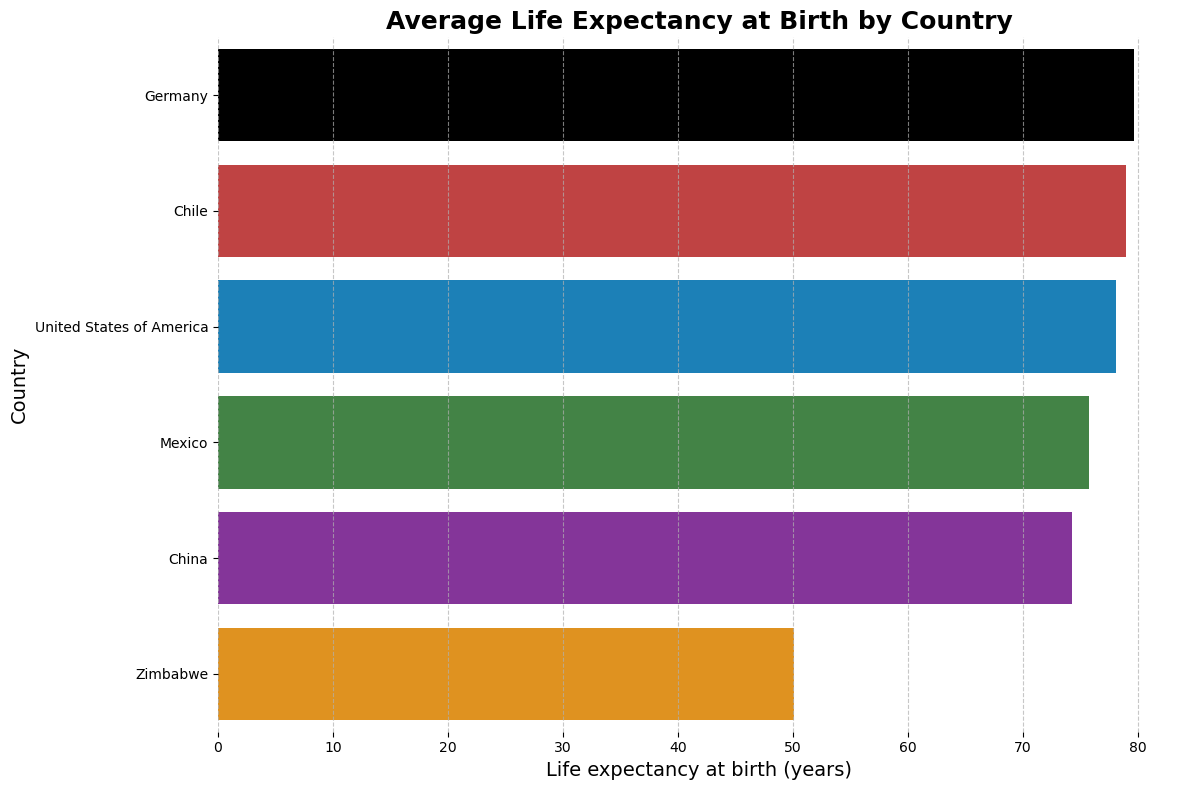

<Figure size 640x480 with 0 Axes>

In [7]:
# Sort dfMeans by GDP in descending order
dfMeans = dfMeans.sort_values(by='LEABY', ascending=False)

# Enhanced GDP Bar Plot
plt.figure(figsize=(12, 8))

# Plotting bar plot with custom color palette
barplot = sns.barplot(x="LEABY", y="Country", data=dfMeans, palette=color_palette)

# Adding titles and labels
plt.title('Average Life Expectancy at Birth by Country', fontsize=18, weight='bold')
plt.xlabel('Life expectancy at birth (years)', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Customizing the plot aesthetics
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()
plt.clf()

## Exploring Distribution of LEABY and GDP by Country

To further investigate the distribution of Life Expectancy at Birth (LEABY) and Gross Domestic Product (GDP) across different countries, we will create violin and swarm plots for both variables. These visualizations will provide a more detailed view of the data beyond the average values, highlighting the variability and distribution of individual data points.

### Step:

1. **Violin Plot for LEABY and GDP**: 
   - **LEABY Violin Plot**: This plot will illustrate the distribution of LEABY values for each country. It combines a box plot with a kernel density plot, offering insights into the shape and density of the distribution.
   - **GDP Violin Plot**: Similarly, this plot will show the distribution of GDP values across countries. It will help visualize the range and density of GDP data and highlight any significant differences between countries.

2. **Swarm Plot for LEABY and GDP**:
   - **LEABY Swarm Plot**: Overlaying the violin plot, the swarm plot will display individual LEABY data points for each country, revealing the exact distribution and clustering of data within each country.
   - **GDP Swarm Plot**: This plot will display individual GDP data points across countries, showing the distribution and dispersion of GDP values. It will help in identifying trends, outliers, and variations in economic output.

These combined plots will provide a comprehensive view of how LEABY and GDP are distributed within each country over the years. By visualizing both the overall distribution and individual data points, we can gain deeper insights into the variability and patterns within the dataset.


### Observations from GDP Violin and Swarm Plot (2000-2015)

The violin plot for GDP, based on data from the years 2000 to 2015, reveals the following distribution characteristics across countries:

- **Chile**, **Mexico** exhibit little variance in GDP on the violin plot. However in looking at the swarm plot the amount of variance is more visible. One might assume a relatively stable economic output with minimal fluctuations for these countries however; the scale of the plots maybe thrown off by the larger GDP of countries such as China and the USA.
- **Zimbabwe** shows no significant variance in GDP during these years, but also may suffer from the same scaling problem to a greater degree that Chile and Mexico experienced.
- **Germany** has a medium spread in GDP values, indicating moderate variability in economic output over the years.
- **China** displays a large variance in GDP, highlighting significant changes and disparities in economic output within the country across the years.
- **United States of America** also shows considerable variance in GDP, although not as pronounced as China, suggesting a range of economic outputs with notable fluctuations over the years.

These observations provide insight into the economic stability and variability among the countries represented during the period from 2000 to 2015. They aslo indicate a need to plot these countries on their own plots in order to better understand trends over time on their own individual scales.

### Observations from LEABY Violin and Swarm Plot (2000-2015)

The violin plot for Life Expectancy at Birth (LEABY), based on data from the years 2000 to 2015, reveals the following distribution characteristics across countries:

- **Chile**, **China**, **Germany**, **Mexico**, and the **United States of America** all exhibit very little variance in LEABY over this period. This indicates a relatively stable life expectancy with minimal fluctuations within these countries.
- **Zimbabwe** stands out with significant variance in LEABY, spanning from approximately 35 to 65 years. This wide range reflects substantial variability in life expectancy, indicating pronounced differences in health and living conditions within the country over the years.

These observations highlight the overall stability in life expectancy for most countries while drawing attention to the considerable variability in Zimbabwe.

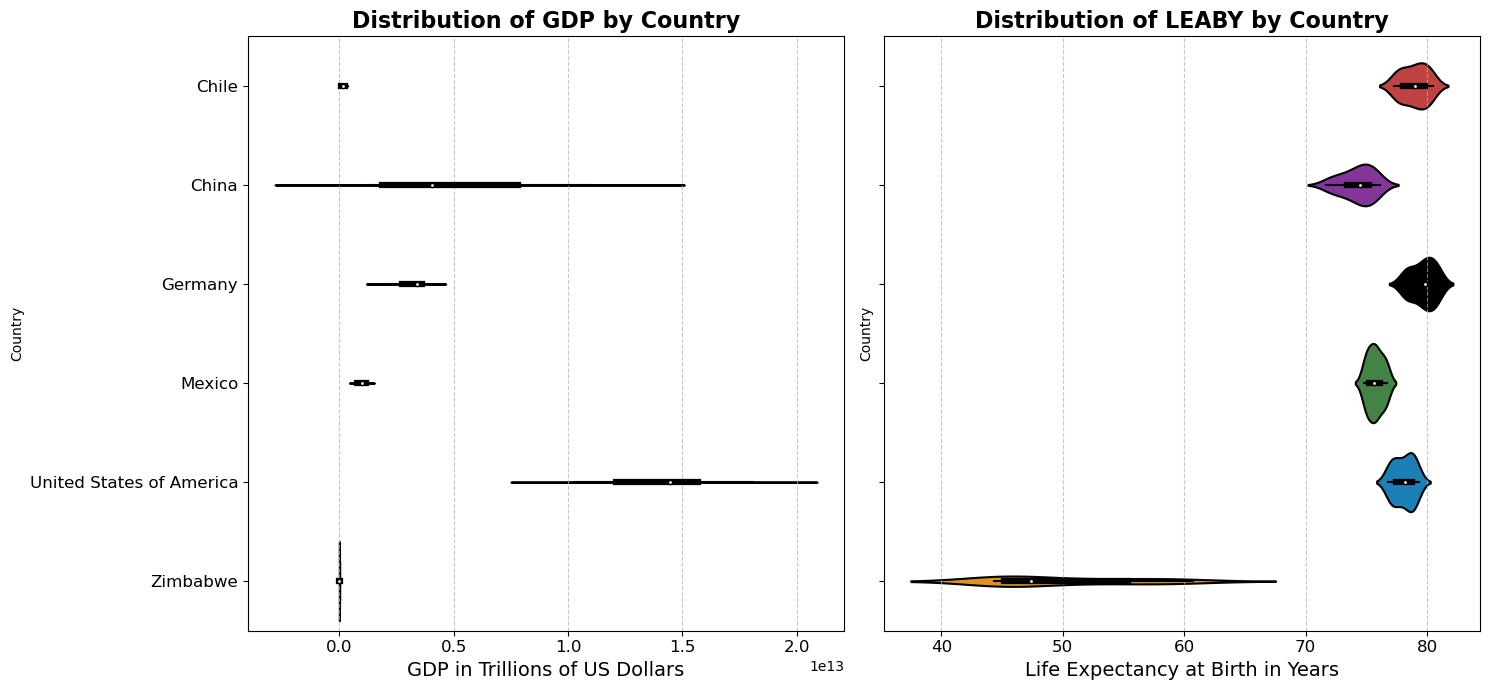

In [8]:
# Create subplots
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))

# Violin plot for GDP
sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, palette=color_palette)
axes[0].set_xlabel("GDP in Trillions of US Dollars", fontsize=14)
axes[0].set_title("Distribution of GDP by Country", fontsize=16, weight='bold')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='both', labelsize=12)

# Violin plot for LEABY
sns.violinplot(ax=axes[1], x="LEABY", y="Country", data=df, palette=color_palette)
axes[1].set_xlabel("Life Expectancy at Birth in Years", fontsize=14)
axes[1].set_title("Distribution of LEABY by Country", fontsize=16, weight='bold')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='both', labelsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


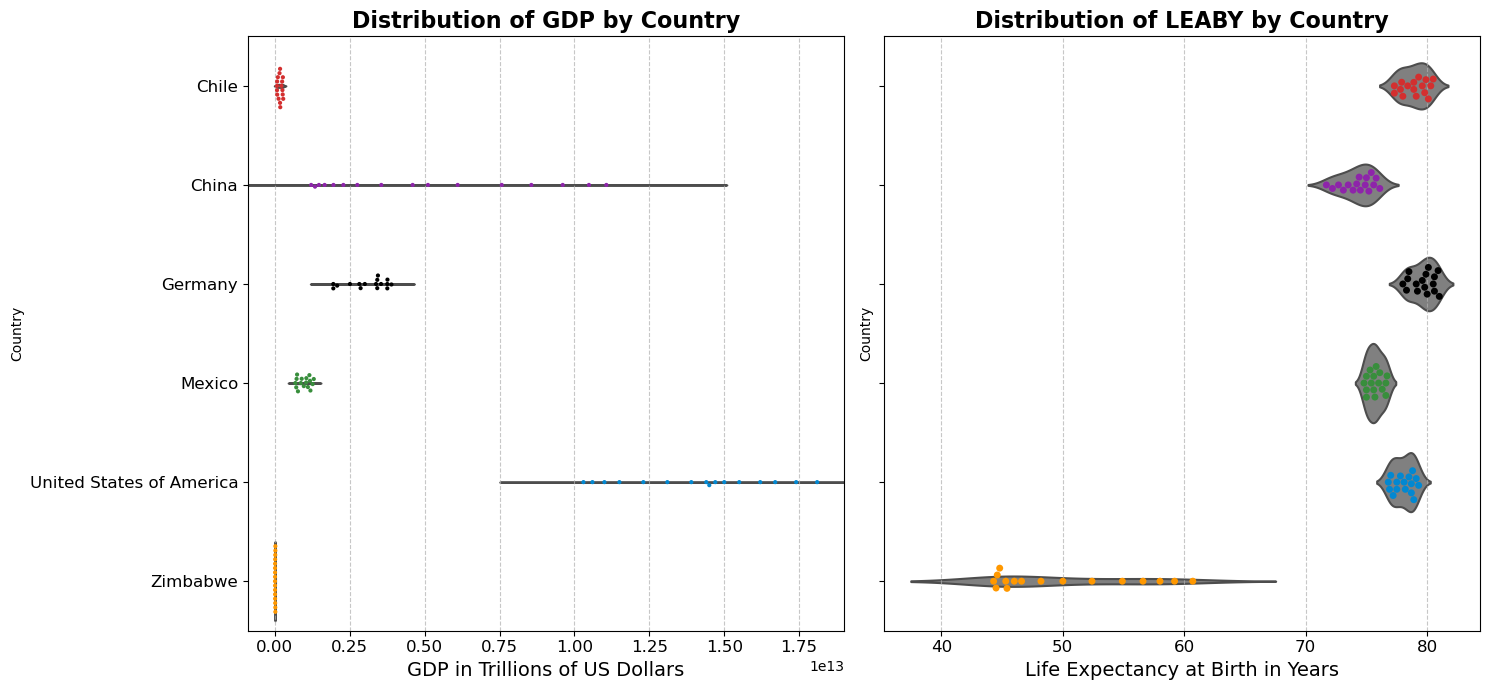

In [9]:
# Create subplots
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))

# Violin plot for GDP
sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, color='gray', inner=None)
sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country, hue=df.Country, palette=color_palette, size=3,legend=False)
axes[0].set_xlabel("GDP in Trillions of US Dollars", fontsize=14)
axes[0].set_title("Distribution of GDP by Country", fontsize=16, weight='bold')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='both', labelsize=12)

# Violin plot for LEABY
sns.violinplot(ax=axes[1], x="LEABY", y="Country",color='gray', data=df, inner=None)
sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country, hue=df.Country,palette=color_palette, legend=False)
axes[1].set_xlabel("Life Expectancy at Birth in Years", fontsize=14)
axes[1].set_title("Distribution of LEABY by Country", fontsize=16, weight='bold')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='both', labelsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## GDP and LEABY Trends (2000-2015)

To further analyze the economic and health trends of the countries in our dataset, we will plot line graphs for both GDP and Life Expectancy at Birth (LEABY) over time. The data spans from the year 2000 to 2015, and the visualizations will focus on:

- **GDP Trends**: A line graph will illustrate the changes in Gross Domestic Product (GDP) for each country across the years. This will help us identify trends, growth patterns, and economic fluctuations over the 15-year period.

- **LEABY Trends**: Similarly, a line graph will display the variations in Life Expectancy at Birth (LEABY) over time for each country. This will provide insights into how life expectancy has evolved and whether there have been significant improvements or declines in health outcomes.

These line graphs will enable us to visualize and compare temporal trends in economic and health metrics across the countries, providing a clearer understanding of long-term patterns and shifts. By examining these trends, we can gain a deeper insight into the development trajectories of each country and the interplay between economic growth and public health.

### GDP Trends (2000-2015)

- **United States**: Exhibits a steady upward trend in GDP over the years, reflecting the characteristics of a stable, steadily growing economy typical of a first-world developed country. The consistent growth is interrupted around 2008, likely due to the recession caused by the housing crisis during that period.
  
- **China**: Displays a near-exponential increase in GDP over the years, highlighting the rapid economic expansion of China throughout this timeframe.
  
- **Germany**: Shows a quick increase in GDP until 2008, followed by some instability, potentially indicating economic challenges and fluctuations from 2008 to 2014.
  
- **Mexico**: Experiences steady GDP growth until around 2008, followed by a significant dip, possibly due to its close economic ties with the United States, which also experienced a downturn during this time. The trend then begins to rise again but shows another decline towards the end of the dataset.
  
- **Chile**: Demonstrates a trend similar to Mexico, with a less pronounced dip around 2008.
  
- **Zimbabwe**: Unlike the other countries, Zimbabwe's GDP trends downward until around 2008, after which it begins a steep incline, indicating a reversal in economic fortunes.

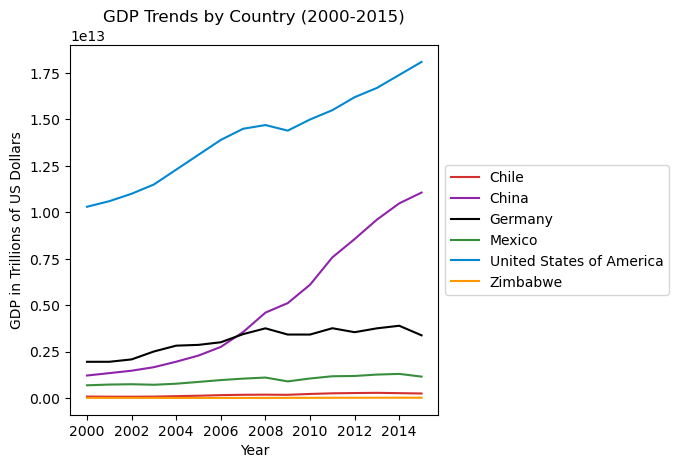

<Figure size 640x480 with 0 Axes>

In [10]:
# Create a color mapping based on the Country
palette = [color_palette[country] for country in df['Country'].unique()]

# Plotting GDP over time with custom color palette
sns.lineplot(x='Year', y='GDP', hue='Country', data=df, palette=color_palette)

# Get the current Axes object
ax = plt.gca()

# Set y-axis label
plt.ylabel('GDP in Trillions of US Dollars')

# Set x ticks to display every other year
years = df.Year.unique()
plt.xticks(years[::2])  # Display every other year

# add title
plt.title("GDP Trends by Country (2000-2015)")
# Place legend outside the plot using bbox_to_anchor
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the figure size to make room for the legend
plt.subplots_adjust(right=0.7)  # Increase the right margin to leave space for the legend

# Show the plot
plt.show()
plt.clf()

NameError: name 'mticker' is not defined

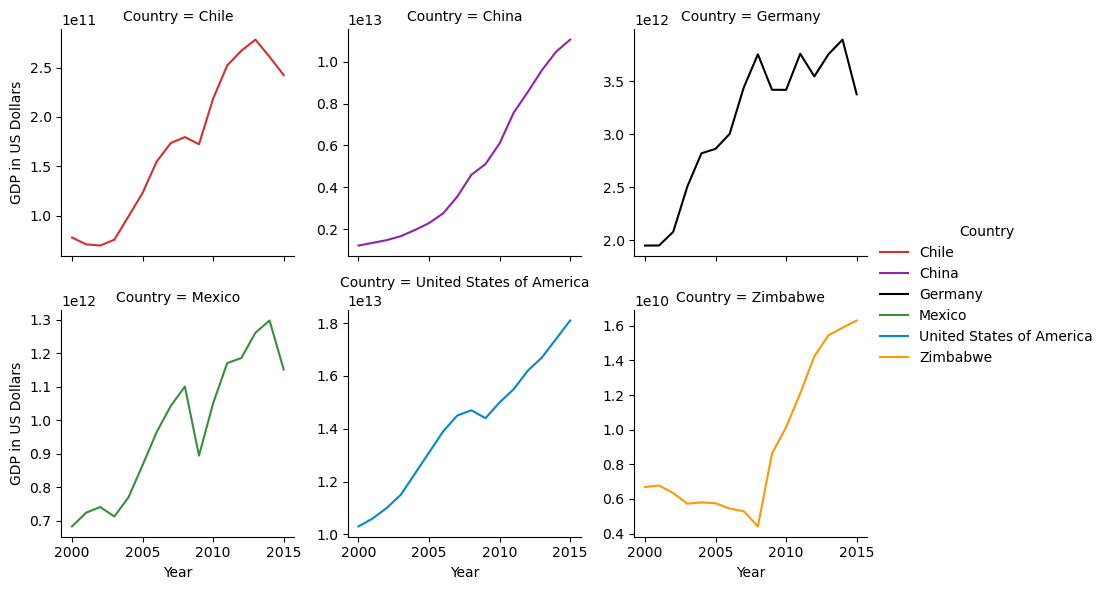

In [11]:
# Create a FacetGrid for GDP over time with custom color palette
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country", sharey=False, palette=color_palette)

# Custom function to format y-axis labels
def trillions_formatter(x, pos):
    return f'{x*1e-12:.1f}T' if x >= 1e12 else f'{x*1e-9:.1f}B'

# Map line plots for GDP over Year for each country
graphGDP = (graphGDP.map(sns.lineplot, "Year", "GDP")
            .add_legend()
            .set_axis_labels("Year", "GDP in US Dollars"))

# Adjust y-axis labels for each subplot
for ax in graphGDP.axes.flat:
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(trillions_formatter))

# Display the plot
plt.show()
plt.clf()

## LEABY Trends (2000-2015)

- **Chile**: Maintains a relatively high and stable Life Expectancy at Birth (LEABY) throughout the period, reflecting consistent health outcomes and living conditions.
  
- **China**: Shows steady improvement in LEABY over the years, indicating gradual enhancements in healthcare and living standards.
  
- **Germany**: Exhibits the highest and most stable LEABY among the countries, reflecting the advanced healthcare system and high quality of life typical of developed European countries.
  
- **Mexico**: Demonstrates a moderate increase in LEABY, suggesting ongoing improvements in health services and living conditions.
  
- **United States**: Maintains a high LEABY with slight fluctuations, indicating a generally high standard of healthcare and living conditions, with some minor variations over time.
  
- **Zimbabwe**: Stands out with significant variability in LEABY, spanning from approximately 35 to 65 years. This wide range reflects considerable health challenges and fluctuations in living conditions, with some improvements in recent years.

In [ ]:
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country, palette=color_palette)

# Get the current Axes object
ax = plt.gca()

# Set y-axis label
plt.ylabel('Life Expectancy at Birth (Years)')

# Set title
plt.title('LEABY Trends by Country (2000-2015)')

# Set x ticks to display every other year
years = df.Year.unique()
plt.xticks(years[::2])  # Display every other yeare

# Place legend outside the plot using bbox_to_anchor
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the figure size to make room for the legend
plt.subplots_adjust(right=0.7)  # Increase the right margin to leave space for the legend

# Show the plot
plt.show()

In [ ]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country", sharey=False, palette=color_palette)

# Map line plots for GDP over Year for each country
graphGDP = (graphGDP.map(sns.lineplot, "Year", "LEABY")
            .add_legend()
            .set_axis_labels("Year", "Life Expectancy at Birth in Years"))

# Display the plot
plt.show()
plt.clf()

## GDP vs LEABY Relationship

In this next step, we will explore the relationship between Gross Domestic Product (GDP) and Life Expectancy at Birth (LEABY) by creating scatter plots. These visualizations will help us understand how economic performance correlates with health outcomes across different countries. Specifically, we aim to determine if higher GDP is associated with higher life expectancy, and to identify any outliers or unique patterns in the data.

By plotting GDP against LEABY for each country, we can:

- **Identify Correlations**: Assess the strength and direction of the relationship between GDP and LEABY.
- **Compare Countries**: Observe how different countries align on the GDP vs LEABY spectrum, highlighting both similarities and disparities.
- **Spot Outliers**: Detect any countries that deviate significantly from the general trend, which could indicate unique socio-economic conditions or anomalies.

These scatter plots will provide a comprehensive view of how economic prosperity and health outcomes are intertwined, offering valuable insights into the broader socio-economic landscape.

Sure! Here's a markdown explanation with conclusions about the relationships seen in the GDP vs LEABY scatter plots:

## Conclusions on GDP vs LEABY Relationship

The scatter plots depicting the relationship between Gross Domestic Product (GDP) and Life Expectancy at Birth (LEABY) reveal a generally positive correlation. Here are the key observations and conclusions drawn from these visualizations:

### Positive Correlation

- **General Trend**: There is a clear positive relationship between GDP and LEABY. Countries with higher GDP tend to have higher life expectancy, suggesting that economic prosperity is associated with better health outcomes.
  
### Country-Specific Insights

- **United States**: As the largest economy, the United States exhibits high GDP and high LEABY, aligning with the overall positive trend. However, the correlation is not as steep compared to rapidly growing economies like China.
  
- **China**: China shows a significant increase in both GDP and LEABY over the years, reflecting the country's rapid economic development and improvements in healthcare and living standards.
  
- **Germany**: Germany, with its stable and high GDP, also maintains a high LEABY, reinforcing the link between a strong economy and good health outcomes.

- **Mexico and Chile**: Both countries show moderate GDP levels with corresponding LEABY values, fitting the general positive correlation but at a lower scale compared to the major economies.
  
- **Zimbabwe**: Zimbabwe stands out as an outlier with low GDP and significantly lower LEABY compared to other countries. This underscores the challenges faced by countries with struggling economies in achieving higher life expectancy.

### Conclusion

These scatter plots underscore the importance of economic growth in enhancing life expectancy. While a higher GDP is generally associated with better health outcomes, the degree of correlation can vary based on specific country conditions, policies, and other socio-economic factors. This analysis highlights the need for balanced economic and social policies to achieve sustainable improvements in both economic performance and public health.

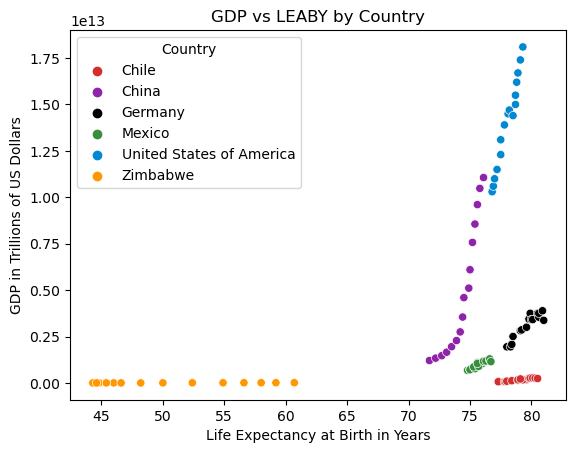

<Figure size 640x480 with 0 Axes>

In [12]:
sns.scatterplot(x=df.LEABY, y= df.GDP, hue=df.Country, palette=color_palette)
plt.xlabel('Life Expectancy at Birth in Years')
plt.ylabel('GDP in Trillions of US Dollars')
plt.title('GDP vs LEABY by Country')
plt.show()
plt.clf()

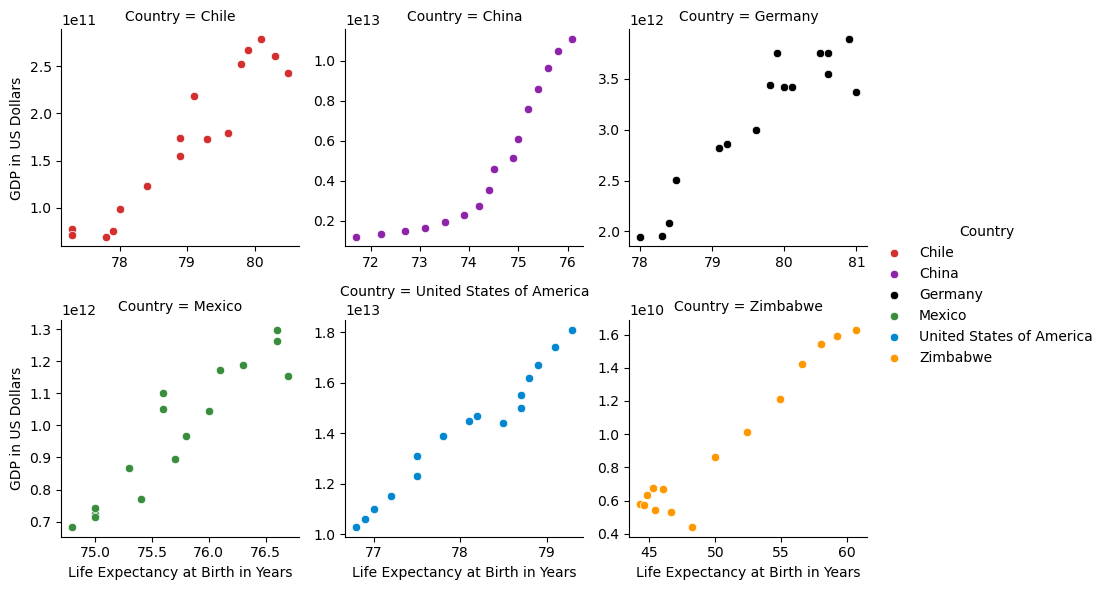

<Figure size 640x480 with 0 Axes>

In [13]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country", sharey=False, sharex = False, palette=color_palette)

# Map scatter plots for GDP vs. Life Expectancy at Birth for each country
graph = (graph.map(sns.scatterplot, "LEABY", "GDP")
            .add_legend()
            .set_axis_labels("Life Expectancy at Birth in Years", "GDP in US Dollars"))

plt.show()
plt.clf()

# Summary: Life Expectancy and GDP Analysis

This project analyzes the relationship between GDP and life expectancy (LEABY) for six countries using data from the World Health Organization and the World Bank. The dataset includes the following columns:

- **Country**: Nation
- **Year**: Observation year
- **Life expectancy at birth (years)**: Life expectancy in years
- **GDP**: Gross Domestic Product in U.S. dollars

## Key Findings

### Data Distribution
- **GDP**: The distribution is right-skewed, with most countries having lower GDP values and a few countries having significantly higher GDPs.
- **LEABY**: The distribution is left-skewed, with most values falling between 75 and 80 years, and has distinct clusters of life expectancy values.

### Mean GDP and LEABY by Country
- **Germany** and the **United States** have the highest average GDPs.
- **Germany** also has the highest average LEABY, followed closely by the **United States** and **Chile**.
- **Zimbabwe** has the lowest average GDP and LEABY, highlighting significant socio-economic challenges.

### GDP Distribution by Country
- **Chile** and **Mexico** show moderate GDP levels.
- **China** and the **United States** display significant GDP values.
- **Germany** is a major European economy with a high GDP.
- **Zimbabwe** has a relatively small GDP.

### LEABY Distribution by Country
- **Germany**, the **United States**, **Chile**, **Mexico**, and **China** show stable LEABY values over the years.
- **Zimbabwe** shows significant variance in LEABY, reflecting challenges in healthcare and living conditions.

### GDP and LEABY Trends (2000-2015)
- **United States**: Steady upward GDP trend with a dip around 2008 due to the recession.
- **China**: Rapid near-exponential GDP growth.
- **Germany**: Stable GDP with some instability post-2008.
- **Mexico**: Moderate GDP growth with dips around 2008.
- **Chile**: Similar GDP trend to Mexico with a less pronounced dip.
- **Zimbabwe**: Downward GDP trend until 2008, followed by a steep incline.

- **Chile**, **China**, **Germany**, and the **United States** show relatively stable LEABY values between 70-80.
- **Zimbabwe** shows significant LEABY variance, highlighting health challenges.

### GDP vs LEABY Relationship
- **Positive Correlation**: Higher GDP is generally associated with higher LEABY.
- **United States**: High GDP and high LEABY with a consistent trend.
- **China**: Significant increases in both GDP and LEABY.
- **Germany**: High GDP and LEABY with stability.
- **Mexico** and **Chile**: Moderate GDP and corresponding LEABY values.
- **Zimbabwe**: Low GDP and significantly lower LEABY, indicating socio-economic challenges.

### Conclusion
This analysis underscores the positive correlation between economic prosperity and health outcomes. Higher GDP typically aligns with higher life expectancy, though the strength of this correlation varies among countries. Addressing socio-economic disparities is crucial for improving life expectancy, especially in countries like Zimbabwe.